# Objective :

##### The analysis delves into the factors affecting customer attrition, with a particular emphasis on the impact of payment methods and contract types.

# Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset 

In [2]:
data = pd.read_csv("Customer Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Inspect Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Note:
##### 1. Replacing blank values in the "TotalCharges" column with "0" to handle cases where tenure is 0 and no total charges are recorded.
##### 2.Converting the "TotalCharges" column to a float data type for accurate numerical analysis.

In [4]:
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### 3.Checking for missing values in the dataset to identify potential null entries across all columns.


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### 4.Generating a summary of key statistical metrics for each numerical column, such as count, mean, standard deviation, minimum, and maximum values.

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000



##### 5.Identifying and counting any duplicated records in the dataset to ensure data integrity

In [8]:
data.duplicated().sum()

0

###### 6.Checking for duplicate customer IDs to confirm the uniqueness of customer entries in the dataset

In [9]:
data["customerID"].duplicated().sum()

0

##### 7. Converting the "SeniorCitizen" column to a categorical variable with "yes" or "no" labels for better readability.

In [10]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)
    

# Data visulization

### 1.Count of Customers by Churn Status
##### Visualizing the count of customers by their churn status using a countplot to compare the distribution of churned and retained customers.

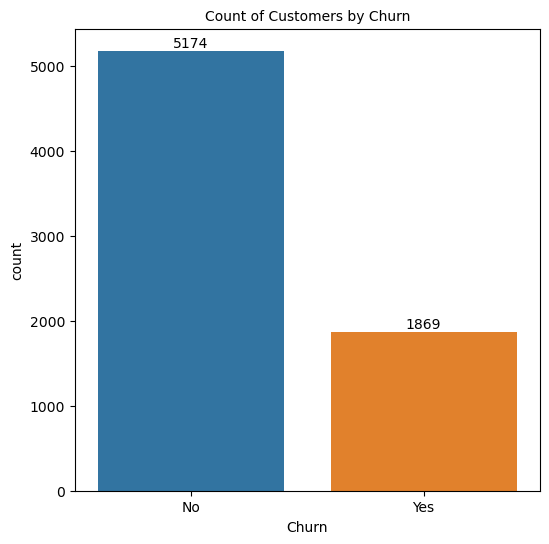

In [36]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'Churn', data = data)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize = 10)
plt.show()

### 2. Churn Rate Distribution
#####  Displaying the churn rate as a pie chart, representing the proportion of customers who have churned versus those who haven't.

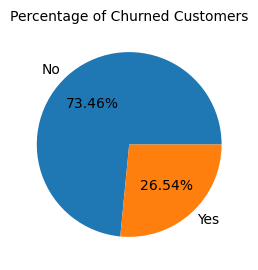

In [35]:
plt.figure(figsize = (3,3))
gb = data.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers" , fontsize = 10 )
plt.show()

##### Based on the pie chart, we can conclude that 26.54% of our customers have churned.. 
# Let's now delve into the factors contributing to this churn.

### 3. Churn by Gender
###### Visualizing the churn status segmented by gender using a countplot to analyze if there are differences in churn rates between male and female customers.

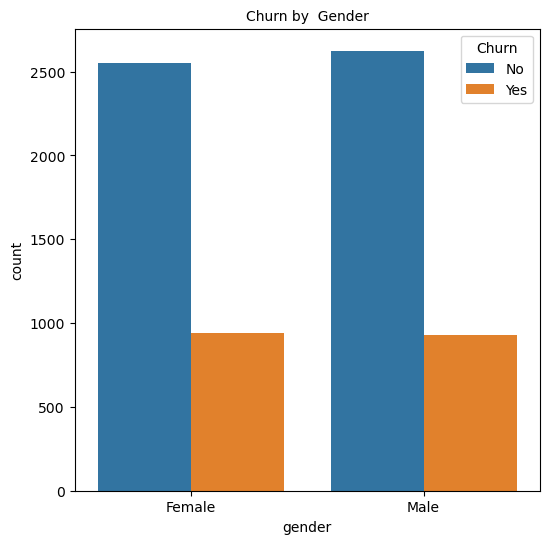

In [45]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'gender', data = data , hue = "Churn")
plt.title("Churn by  Gender", fontsize = 10)
plt.show()

### 4. Count of Customers by Senior Citizen Status
###### Displaying the distribution of customers based on their senior citizen status to understand how age demographics relate to churn.

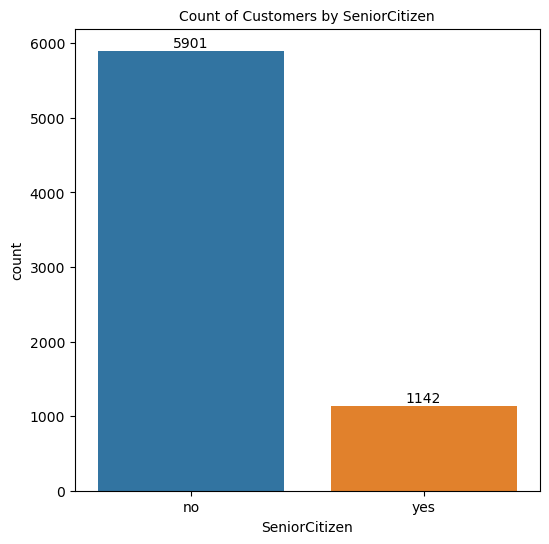

In [46]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'SeniorCitizen', data = data)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen", fontsize = 10)
plt.show()

### 5. Churn by Senior Citizen Status (Stacked Bar Chart)
##### Creating a stacked bar chart to visualize the percentage of churned and retained customers among senior citizens versus non-senior citizens.

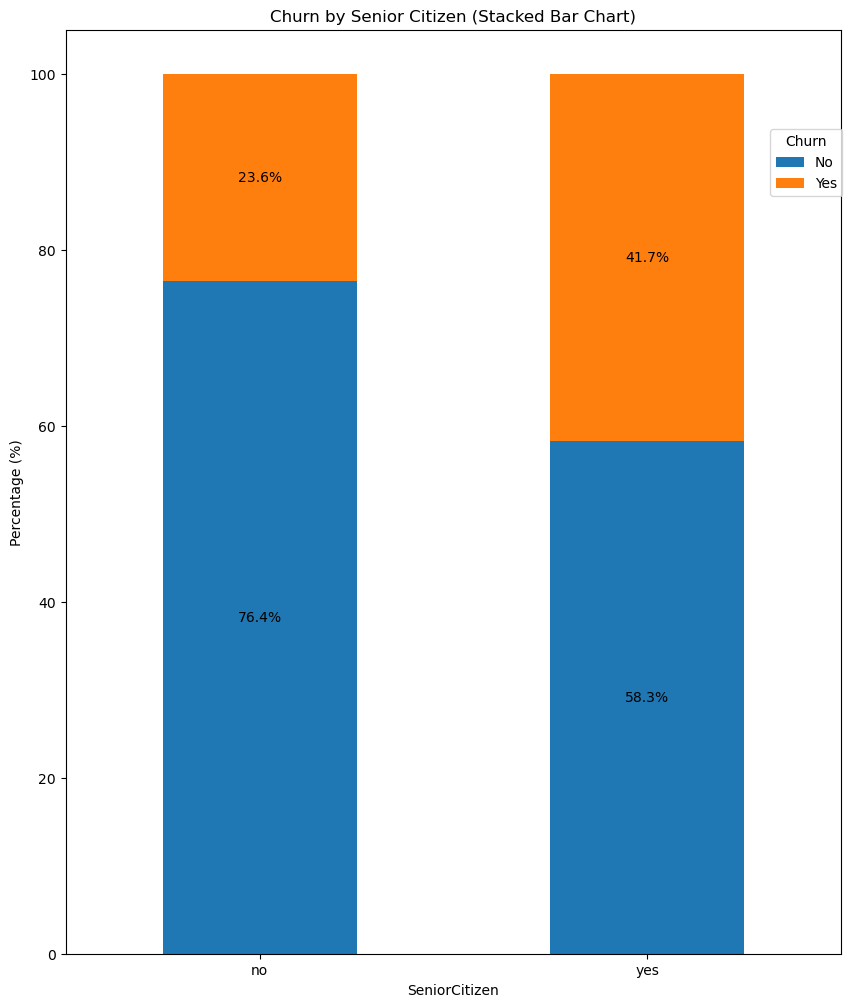

In [60]:
total_counts = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(10,12))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

##### A greater percentage of senior citizens have experienced churn compared to other demographic groups. This trend highlights the vulnerability of this age segment in terms of customer retention.

### 6. Distribution of Tenure by Churn Status
##### Using a histogram to visualize the distribution of customer tenure and its relationship with churn status.

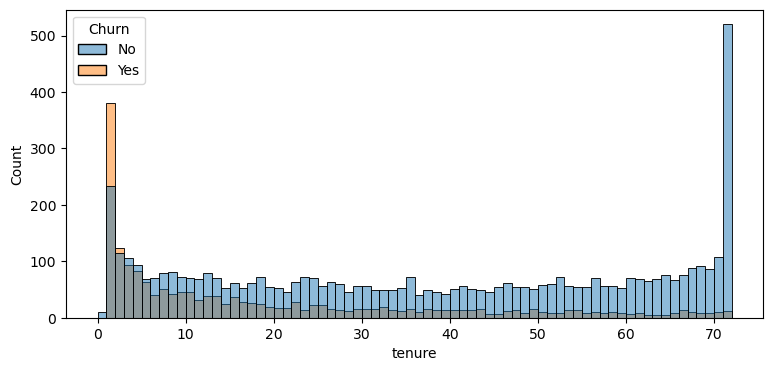

In [52]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = data, bins = 72, hue = "Churn")
plt.show()

##### Customers with longer tenure are more likely to remain loyal, while those with shorter tenures are more prone to churn. This suggests that retaining customers over time is crucial for maintaining a stable customer base.

### 7. Churn by Contract Type
##### Visualizing the count of customers based on their contract type to identify which contract types are associated with higher churn rates.

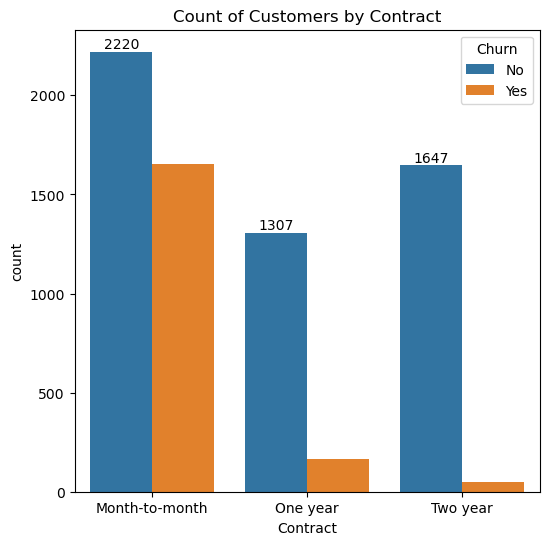

In [55]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = "Contract", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

##### Customers with month-to-month contracts demonstrate a higher likelihood of churning compared to those with one- or two-year contracts. This observation indicates that the duration of the contract significantly impacts customer retention.

### 8. Overview of Data Columns
##### Listing the columns in the dataset to provide an overview of the features available for analysis.

In [56]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### 9. Count Plots for Service Features
###### Creating multiple count plots for various service features to analyze their impact on customer churn.

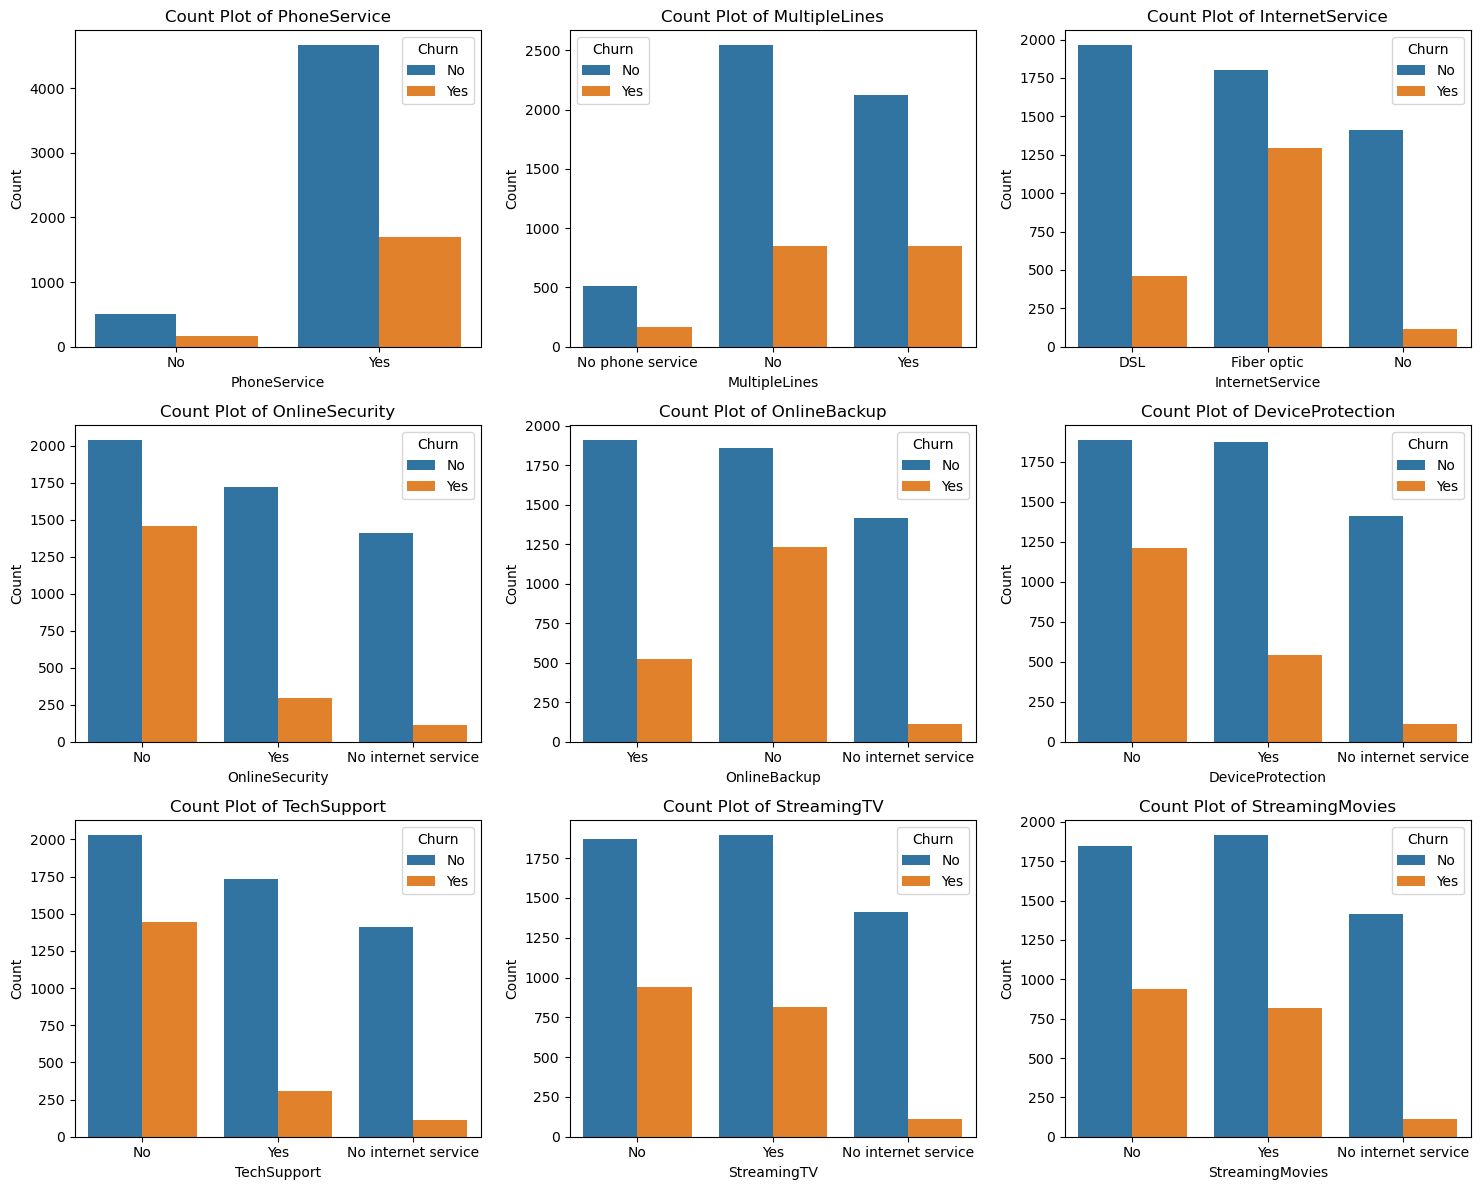

In [57]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue = data["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###### The analysis indicates that a significant proportion of customers who remain loyal utilize services such as PhoneService, InternetService—especially DSL—and OnlineSecurity. Conversely, the churn rates are substantially elevated among customers who do not subscribe to services like OnlineBackup, TechSupport, and StreamingTV. This suggests that the availability and usage of these services play a critical role in customer retention.

### 10. Churned Customers by Payment Method
###### Visualizing the count of churned customers segmented by payment method to identify trends in payment preferences related to customer retention.

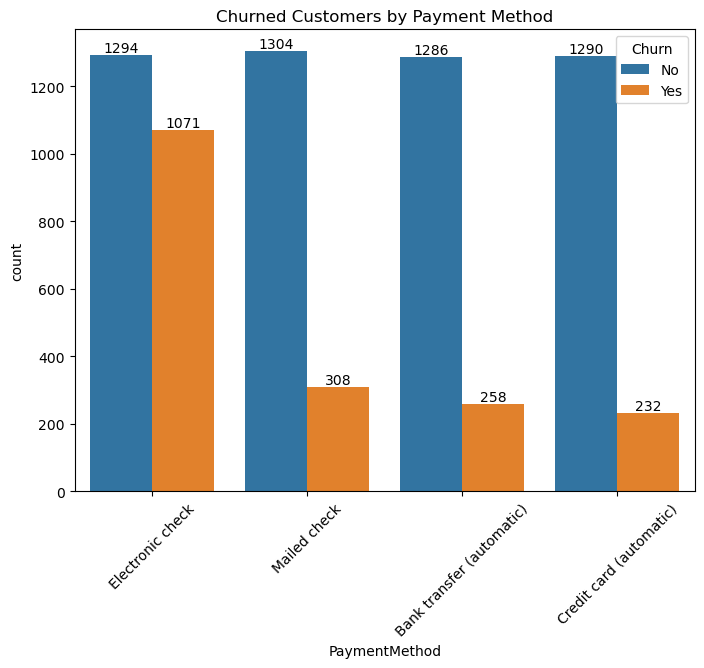

In [59]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

##### Customers utilizing electronic checks as a payment method exhibit a higher propensity to churn. This trend suggests that the choice of payment method may significantly influence customer retention rates.